# Assignment 2: Non-Linear Classification with SVM

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia

In this assignment, you will implement your own version of SVM with kernels to classify non-linear data. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_svm.ipynb**.


## 1. DATA SET AND VISUALIZATION FUNCTION
We will use the non-linear toy data called the Moon dataset. You may use the code snippet below to generate the train/test set. Feel free to change the number of samples, and noise level. Additionally, a function plot_svm() is provided to help you visualize the decision boundary, margin, and support vectors on the dataset in 2D feature space.

In [0]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data
    
    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax] 
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 




- - -
## 2. TRAIN SVM FOR CLASSIFICATION TASK (20 pts)

Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) Gaussian RBF. For each kernel, you will need to report the following:

* Confusion matrix, Recall, and Precision. If applicable, discuss any tuning process on C and/or gamma to get to a reasonable result.
* Use the provided plot_svm() to visualize the SVM in 2D. This might give you some insight on how SVM determine the margin and support vector on the Moon dataset.



Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   9 out of   9 | elapsed:   10.2s finished


Best parameters: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Confusion Matrix:  [[37  8]
 [10 45]]
Precision:  0.8490566037735849
Recall:  0.8181818181818182


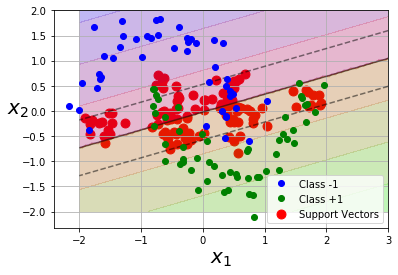

In [0]:
# Confusion matrix, recall and precision
# Discuss any tuning process on C and/or gamma 
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform

# 1) Linear
svm_clf = SVC(kernel="linear")#, C=5.95)
# svm_clf.fit(X_train_scaled, y_train)

param_distributions = {"C": [1,10,100]} 
cv = GridSearchCV(svm_clf, param_distributions, verbose=1, cv=3, n_jobs=20)

cv.fit(X_train_scaled, y_train)
cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = cv.best_estimator_.predict(X_test_scaled)

#Fine-tuning
print("Best parameters:", cv.best_estimator_)
# y_pred = svm_clf.predict(X_train_scaled)

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: " , recall_score(y_test, y_pred))

plot_svm(cv.best_estimator_, X_test_scaled, y_test, axes=[-2, 3, -2, 2])

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:   11.9s
[Parallel(n_jobs=20)]: Done 324 out of 324 | elapsed:   14.4s finished


Best parameters: SVC(C=100, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=6, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Confusion Matrix:  [[37  8]
 [ 8 47]]
Precision:  0.8545454545454545
Recall:  0.8545454545454545


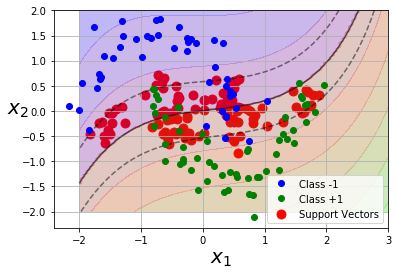

In [0]:
# # 2) Polynomial
svm_clf = SVC(kernel="poly")#, degree=5, coef0=0, C=5)
# svm_clf2.fit(X_train_scaled, y_train)

# y_pred = svm_clf2.predict(X_train_scaled)

# print(confusion_matrix(y_train, y_pred))
# print(precision_score(y_train, y_pred))
# print(recall_score(y_train, y_pred))

# plot_svm(svm_clf2, X_train_scaled, y_train, axes=[-2, 3, -2, 2])
param_distributions = {"C": [1,10,100], "degree":[2, 3, 4,6], "coef0":[0, 0.5, 1], "gamma": [0.0001,0.001,0.01]} 
cv = GridSearchCV(svm_clf, param_distributions, verbose=1, cv=3, n_jobs=20)

cv.fit(X_train_scaled, y_train)
cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = cv.best_estimator_.predict(X_test_scaled)

#Fine-tuning
print("Best parameters:", cv.best_estimator_)
# y_pred = svm_clf.predict(X_train_scaled)

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: " , recall_score(y_test, y_pred))


plot_svm(cv.best_estimator_, X_test_scaled, y_test, axes=[-2, 3, -2, 2])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    9.5s
[Parallel(n_jobs=20)]: Done  60 out of  60 | elapsed:   13.3s finished


Best parameters: SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Confusion Matrix:  [[42  3]
 [ 5 50]]
Precision:  0.9433962264150944
Recall:  0.9090909090909091


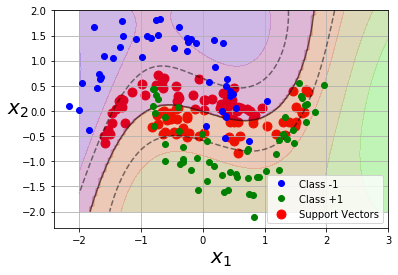

In [0]:
# # 3) RBF
svm_clf = SVC(kernel="rbf")#, gamma=0.005, C=5)
# svm_clf3.fit(X_train_scaled, y_train)

# y_pred = svm_clf3.predict(X_train_scaled)

# print(confusion_matrix(y_train, y_pred))
# print(precision_score(y_train, y_pred))
# print(recall_score(y_train, y_pred))

# plot_svm(svm_clf3, X_train_scaled, y_train, axes=[-2, 3, -2, 2])
param_distributions = {"C": [1,3,5,7,9], "gamma": [0.0001,0.001,0.01,0.1]} 
cv = GridSearchCV(svm_clf, param_distributions, verbose=1, cv=3, n_jobs=20)

cv.fit(X_train_scaled, y_train)
cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = cv.best_estimator_.predict(X_test_scaled)

#Fine-tuning
print("Best parameters:", cv.best_estimator_)
# y_pred = svm_clf.predict(X_train_scaled)

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: " , recall_score(y_test, y_pred))


plot_svm(cv.best_estimator_, X_test_scaled, y_test, axes=[-2, 3, -2, 2])

## 3. IMPLEMENT YOUR OWN NON-LINEAR SVM (60 pts)
Now that you see how the standard library SVM perform on the dataset, you will attempt to implement your own version of SVM. To help you, a template of SVM has been created including the quadratic optimization. Essensially, you will get the optimized value of $\alpha$ for free. Note that there are **6 subtasks** which you need to implement in order to get the SVM to work properly.

In [0]:
# Use the information from the lecture slides to formulate the SVM Kernels. 
# To help you get started, the Linear Kernel (simply just a dot product) has been provided to you. 
# These kernel functions will be called in the SVM class
# Resources: http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/

# Linear Kernel             
def linear_kernel(u, v):
  # double nested for loop
    return np.dot(u, v)

# Polynomial Kernel
def polynomial_kernel(u, v, p=3):
    # SUBTASK 1 (5 pts): Implement the kernel formulation here
    return np.power(np.dot(u,v), p)

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=0.5):
    # SUBTASK 2 (5 pts): Implement the kernel formulation here
    return np.exp(-gamma*np.linalg.norm(u-v)**2)
  


In [0]:
# is w a vector that can have zeroes; y and x in the b equation (slide 32) is not filtered right?
# why do we not calculate w for nonlinear as shown in the slides? (past 32)  
# where do we implement the individual kernel function calls
# if each of the x values in the b formula (slide 32) is a coordinate, how does b become a value, not a vector
# how to do subtask 6 

import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin
# s = MySVM(kernel = "", C=, gamma="")
# s.fit
class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        
        m_samples, n_features = X.shape

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-3
        # SUBTASK 3 (5 pts): Find the support vectors
        # finding x, y and calculate w.
        self.support_vectors_ = X[sv]
        self.support_vectors_labels = y[sv]
        self.support_vectors_alpha = a[sv]
        
        self.alpha = a
        self.X = X
        self.y = y

        # length of support vectors 
        print("%d support vectors out of %d points" % (sum(sv), m_samples))
        
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            
            # SUBTASK 5 (10 pts): Compute the Weight vector w
            for x in range(m_samples):
                if a[x] > 1e-3:
                  self.w += a[x]*y[x]*X[x]
            
            # SUBTASK 4 (10 pts): Compute the Intercept b
            ns = len(self.support_vectors_)
            total = 0 
            for x in range(m_samples):
              if a[x] > 1e-3:
                total += (y[x] - np.dot(self.w.T, X[x]))
            self.b = 0
            self.b -= total/ns
            
        else:
            # No need to compute for w in non-linear case
            # Instead, we will use alpha (a) directly to predict the labels
            
            self.w =  None
            
            self.ydiff = np.zeros((len(self.support_vectors_),1))
            for i in range(len(self.support_vectors_)):
              self.ytemp = np.zeros((len(self.support_vectors_),1))
              
              for j in range(len(self.support_vectors_)):
                  self.ytemp += (self.support_vectors_alpha[j]*
                               self.support_vectors_labels[j]*
                               self.kernel(self.support_vectors_[i],self.support_vectors_[j]))
                
              self.ydiff[i] = self.support_vectors_labels[i] - self.ytemp[i]
            
            total = 0
            ns = len(self.support_vectors_)
            for x in range(len(self.ydiff)):
              total += self.ydiff[x] 
            self.b = -total/ns
            

    def decision_function(self, X_test):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None: #if it is linear
            return np.dot(X_test, self.w) + self.b
        else:
            # SUBTASK 6 (25 pts): for non-linear case, implement the kernel trick to predict label here
            ypredict = np.zeros((len(X_test),1))
            for i in range(len(X_test)):
              s = 0
              for j in range(len(self.support_vectors_)):
                s += (self.support_vectors_alpha[j]*
                         self.support_vectors_labels[j]*
                         self.kernel(X_test[i], self.support_vectors_[j]))
               
              ypredict[i] = s + self.b
            return ypredict

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))

# classifier = MySVM(kernel = rbf_kernel, C=5)
# classifier.fit(X_train_scaled, y_train)
# yhat = classifier.predict(X_test_scaled)

# plot_svm(classifier, X_test_scaled, y_test, axes=[-2, 3, -2, 2])

---
## 4. COMPARE YOUR IMPLEMENTATION TO THE STANDARD LIBRARY (20 pts)
Now that you have implemented your own SVM class, let's use it! Create 3 instances of your SVM class, each with a difference kernel (Linear, Polynomial, and RBF kernel), then train and test its performance in the Moon dataset as above. Report the same metrics (confusion matrix, recall, and precision). You can use the plot_svm() function to visualize your SVM with decision boundary, margin, and support vectors on the dataset.

Based on the number above, compare your SVM implementation with the standard library version. How did your SVM perform in comparison? Is there any major differences between the algorithms? Finally, reflecting on your experience implementing a learning algorithm for this assignment.

     pcost       dcost       gap    pres   dres
 0: -4.0822e+02 -7.8469e+03  2e+04  8e-01  3e-14
 1: -3.5659e+02 -2.4549e+03  3e+03  5e-02  2e-14
 2: -3.9012e+02 -8.4932e+02  5e+02  8e-03  2e-14
 3: -4.5364e+02 -6.3875e+02  2e+02  3e-03  2e-14
 4: -4.7911e+02 -5.8270e+02  1e+02  1e-03  2e-14
 5: -4.9500e+02 -5.5132e+02  6e+01  6e-04  2e-14
 6: -5.0246e+02 -5.3800e+02  4e+01  3e-04  2e-14
 7: -5.0780e+02 -5.2830e+02  2e+01  2e-04  2e-14
 8: -5.1096e+02 -5.2315e+02  1e+01  8e-05  2e-14
 9: -5.1278e+02 -5.1953e+02  7e+00  2e-05  2e-14
10: -5.1538e+02 -5.1634e+02  1e+00  2e-06  3e-14
11: -5.1576e+02 -5.1587e+02  1e-01  4e-15  3e-14
12: -5.1581e+02 -5.1581e+02  1e-03  1e-14  3e-14
13: -5.1581e+02 -5.1581e+02  1e-05  7e-15  3e-14
Optimal solution found.
105 support vectors out of 400 points
Confusion Matrix:  [[37  8]
 [ 8 47]]
Precision:  0.8545454545454545
Recall:  0.8545454545454545


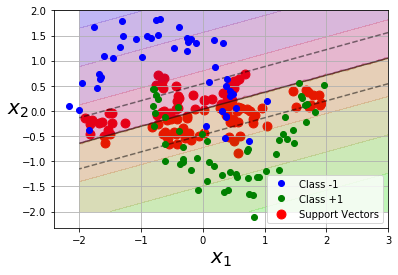

In [0]:
classifier = MySVM(kernel = linear_kernel, C=5)
classifier.fit(X_train_scaled, y_train)
yhat = classifier.predict(X_test_scaled)

plot_svm(classifier, X_test_scaled, y_test, axes=[-2, 3, -2, 2])
print("Confusion Matrix: ", confusion_matrix(y_test, yhat))
print("Precision: ", precision_score(yhat, y_test))
print("Recall: ",recall_score(yhat, y_test))

     pcost       dcost       gap    pres   dres
 0: -4.2948e+02 -1.0665e+04  3e+04  1e+00  2e-13
 1: -3.2944e+02 -4.6458e+03  7e+03  2e-01  2e-13
 2: -2.7431e+02 -1.1158e+03  1e+03  3e-02  5e-14
 3: -3.2552e+02 -5.1115e+02  2e+02  4e-03  3e-14
 4: -3.3722e+02 -4.9082e+02  2e+02  3e-03  2e-14
 5: -3.4870e+02 -4.4206e+02  1e+02  4e-04  3e-14
 6: -3.6318e+02 -4.1589e+02  5e+01  2e-04  3e-14
 7: -3.7320e+02 -3.9898e+02  3e+01  2e-05  3e-14
 8: -3.7918e+02 -3.8893e+02  1e+01  7e-06  3e-14
 9: -3.8136e+02 -3.8549e+02  4e+00  2e-06  3e-14
10: -3.8294e+02 -3.8329e+02  4e-01  4e-08  3e-14
11: -3.8305e+02 -3.8317e+02  1e-01  1e-08  3e-14
12: -3.8307e+02 -3.8315e+02  8e-02  4e-09  3e-14
13: -3.8310e+02 -3.8311e+02  2e-02  1e-14  3e-14
14: -3.8311e+02 -3.8311e+02  4e-04  2e-14  3e-14
Optimal solution found.
82 support vectors out of 400 points
Confusion Matrix:  [[37  8]
 [ 7 48]]
Precision:  0.8727272727272727
Recall:  0.8571428571428571


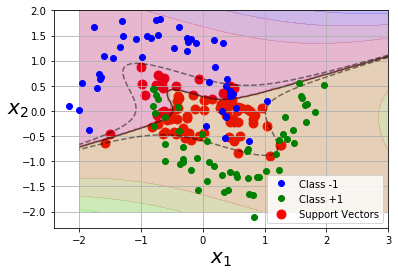

In [0]:
classifier = MySVM(kernel = polynomial_kernel, C=5)
classifier.fit(X_train_scaled, y_train)
yhat = classifier.predict(X_test_scaled)

plot_svm(classifier, X_test_scaled, y_test, axes=[-2, 3, -2, 2])
print("Confusion Matrix: ", confusion_matrix(y_test, yhat))
print("Precision: ", precision_score(yhat, y_test))
print("Recall: ",recall_score(yhat, y_test))

     pcost       dcost       gap    pres   dres
 0:  2.6238e+01 -4.7616e+03  1e+04  5e-01  5e-15
 1:  7.2735e+01 -7.5543e+02  8e+02  2e-15  5e-15
 2: -4.1779e+01 -3.4079e+02  3e+02  6e-15  4e-15
 3: -7.4673e+01 -2.5576e+02  2e+02  7e-15  4e-15
 4: -9.4098e+01 -2.1701e+02  1e+02  1e-15  4e-15
 5: -1.0718e+02 -1.8808e+02  8e+01  2e-15  4e-15
 6: -1.2014e+02 -1.5754e+02  4e+01  2e-15  5e-15
 7: -1.2387e+02 -1.4978e+02  3e+01  7e-16  5e-15
 8: -1.2773e+02 -1.4229e+02  1e+01  3e-15  5e-15
 9: -1.3081e+02 -1.3721e+02  6e+00  8e-15  6e-15
10: -1.3247e+02 -1.3480e+02  2e+00  9e-15  6e-15
11: -1.3310e+02 -1.3384e+02  7e-01  2e-15  7e-15
12: -1.3334e+02 -1.3357e+02  2e-01  1e-14  6e-15
13: -1.3344e+02 -1.3347e+02  3e-02  3e-15  6e-15
14: -1.3345e+02 -1.3345e+02  5e-04  2e-15  6e-15
15: -1.3345e+02 -1.3345e+02  7e-06  9e-15  7e-15
Optimal solution found.
39 support vectors out of 400 points
Confusion Matrix:  [[43  2]
 [ 0 55]]
Precision:  1.0
Recall:  0.9649122807017544


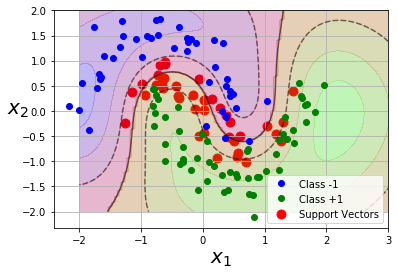

In [0]:
classifier = MySVM(kernel = rbf_kernel, C=5)
classifier.fit(X_train_scaled, y_train)
yhat = classifier.predict(X_test_scaled)

plot_svm(classifier, X_test_scaled, y_test, axes=[-2, 3, -2, 2])
print("Confusion Matrix: ", confusion_matrix(y_test, yhat))
print("Precision: ", precision_score(yhat, y_test))
print("Recall: ",recall_score(yhat, y_test))

# Explanation & Reflection
My SVM implementation did better than the standard library versions for each of the three kernels, linear, polynomial, and rbf. Below is the data summary of the performances:

Library Implementation
Linear(P: 0.849, R: 0.818), Polynomial(P: 0.854, R:0.854), RBF(P: 0.943, R: 0.909)

My SVM Implementation
Linear(P: 0.854, R: 0.854), Polynomial(P: 0.872, R: 0.857), RBF(P: 1.0, R: 0.964)

The reason why SVM may have performed better than the library implementations may be because scaled makes a big difference in performance. For example, when I ran non-scaled functions on the library implementations their precisions and recall did equally or slightly better than my implementations. Another reason may be from needing better tuning of parameteres. However, there are no major differences in performances overeall, regardless. 

With regards to differences between the algorithms, the kernels performanced in this order: rbf > polynomial > linear. 

As for my reflection on completing this assignment, I thought it was conceptually difficult to understand at first. It was a lot of mathematical and vector operations piling up in loops. Hence, we had to make sure the dimensions measured up correctly and everything. I found that we had to rely on the slides a lot of more than I expected which was interesting as well. But overall, I thought it was a good experience seeing how fit() and predict() functions, both of which are well used in our SVMs, were implemented in the background. So in seeing the architecture of the code, it was important to see how the mathemtical formulas from the slides helped make it all work in code as well. 


## Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Part of the codes used in this assignment is modified from Mathieu Blondel under the 3-Clause BSD License. Best of luck and have fun!